# Chapitre 2: Le K-Means

L'objectif de ce chapitre et de mettre en évidence les intérêts de cet algorithme en finance


##### 2.2 Implémentation d'un algorithme de K-Means

In [2]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
##### Mise en place de la base de données
from sklearn import datasets
# Importation
iris = datasets.load_iris()
data_iris = pds.DataFrame(iris.data[:, :2], columns=["Longueur des Sépales", "Largeur des Sépales"])
target = pds.DataFrame(iris.target, columns=["Fleur"])
bd = pds.concat((data_iris,target), axis=1)

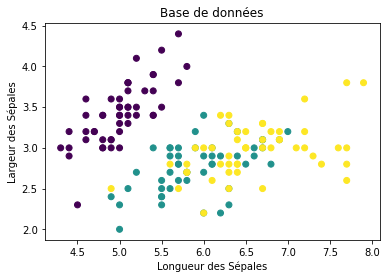

In [16]:
##### Mise en place de la base de données
from sklearn import datasets
# Importation
iris = datasets.load_iris()
data_iris = pds.DataFrame(iris.data[:, :2], 
                          columns=["Longueur des Sépales", "Largeur des Sépales"])
target = pds.DataFrame(iris.target, columns=["Fleur"])
bd = pds.concat((data_iris,target), axis=1)

##### Affichage de la base de données sous un nuage de points
plt.scatter(bd.values[:,0], bd.values[:,1], c=bd.values[:,2])
plt.xlabel("Longueur des Sépales")
plt.ylabel("Largeur des Sépales")
plt.title("Base de données")
plt.show()

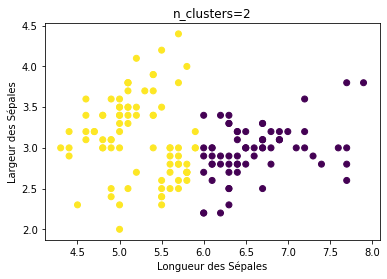

In [19]:
##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
label = km.fit_predict(data_iris.values)

##### Affichage de la base de données sous un nuage de points
plt.scatter(bd.values[:,0], bd.values[:,1], c=label)
plt.xlabel("Longueur des Sépales")
plt.ylabel("Largeur des Sépales")
plt.title("n_clusters=2")
plt.show()

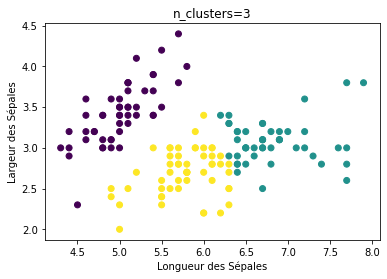

In [65]:
##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
label = km.fit_predict(data_iris.values)

##### Affichage de la base de données sous un nuage de points
plt.scatter(bd.values[:,0], bd.values[:,1], c=label)
plt.xlabel("Longueur des Sépales")
plt.ylabel("Largeur des Sépales")
plt.title("n_clusters=3")
plt.show()

In [63]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

##### On rajoute une variable à la base de données

In [26]:
##### Mise en place de la base de données
# Importation
iris = datasets.load_iris()
data_iris = iris.data[:, :3].reshape(150,3)
target = iris.target.reshape(150,1)

# Organisation de la base de données
bd = np.concatenate((data_iris,target), axis = 1)
bd_bis = pds.DataFrame(bd, columns = ["Longueur des sépales", "Largeur des sépales",
                                  "Longueur des pétales", "Espèce"])
bd_bis

,Longueur des sépales,Largeur des sépales,Longueur des pétales,Espèce
0,5.1,3.5,1.4,0.0
1,4.9,3.0,1.4,0.0
2,4.7,3.2,1.3,0.0
3,4.6,3.1,1.5,0.0
4,5.0,3.6,1.4,0.0
...,...,...,...,...
145,6.7,3.0,5.2,2.0
146,6.3,2.5,5.0,2.0
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.0


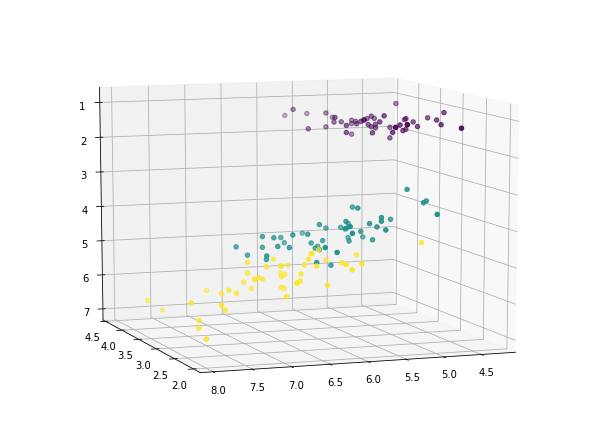

In [27]:
from mpl_toolkits.mplot3d import Axes3D

##### Affichge avec le groupe réel
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-170, azim=110)
ax.scatter(bd[:,0], bd[:,1], bd[:,2], c=bd[:,3])

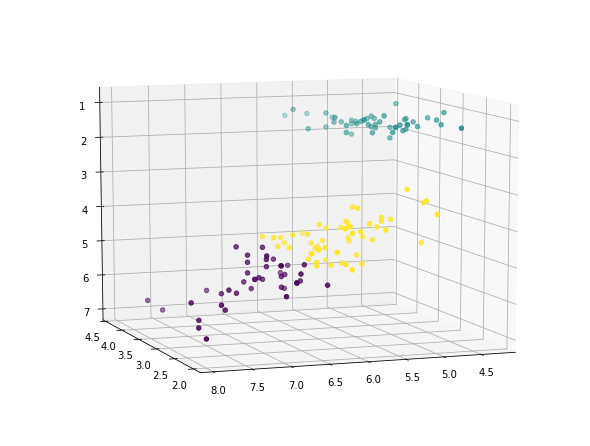

In [28]:
##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
label = km.fit_predict(bd[:,0:3])

##### Affichage avec le groupe du K-Means
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-170, azim=110)
ax.scatter(bd[:,0], bd[:,1], bd[:,2], c=label)

## 2.3 Application de cet algorithme en finance


In [23]:
bd_cac40 = pds.read_csv("CAC40.csv", index_col="Date", parse_dates=True)

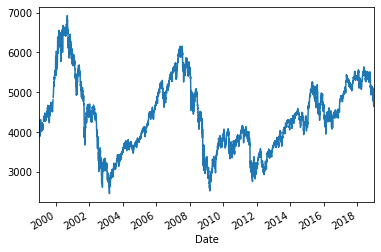

In [24]:
bd_cac40["Open"].plot()

In [26]:
bd_bitcoin = pds.read_csv("btc_eur.csv", index_col="Date", parse_dates=True)

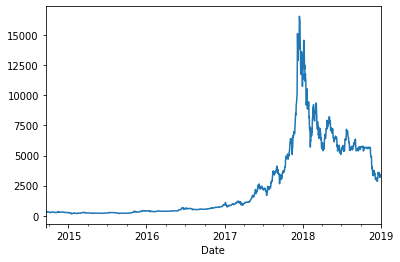

In [27]:
bd_bitcoin["Open"].plot()

##### Application de l'algorithme de K-means au CAC40

In [28]:
bd_cac40["O/C"] = bd_cac40["Open"]/bd_cac40["Close"]
bd_cac40["O/H"] = bd_cac40["Open"]/bd_cac40["High"]
bd_cac40["O/L"] = bd_cac40["Open"]/bd_cac40["Low"]

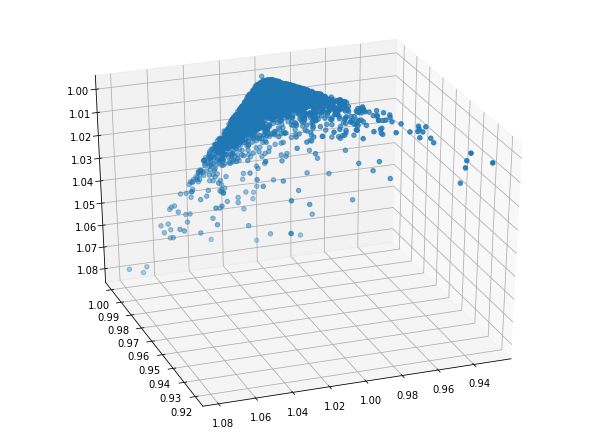

In [30]:
from mpl_toolkits.mplot3d import Axes3D



##### Affichage
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(bd_cac40["O/C"], bd_cac40["O/H"], bd_cac40["O/L"])

In [31]:
##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
label = km.fit_predict(bd_cac40[["O/C", "O/H", "O/L"]].dropna().values)

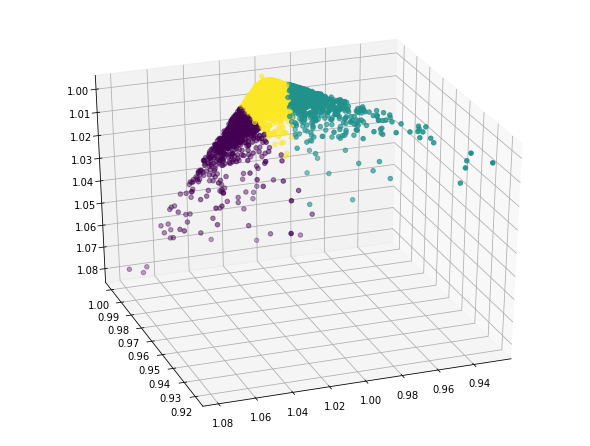

In [32]:
##### Affichage
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(bd_cac40["O/C"], bd_cac40["O/H"], bd_cac40["O/L"], c=label)

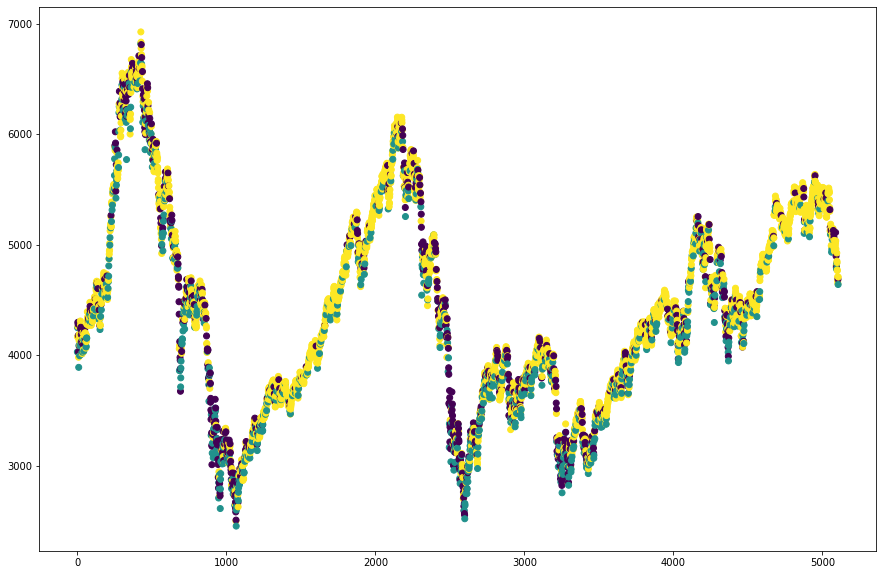

In [33]:
x = bd_cac40[["Open"]].dropna().values
h_ = [h for h in range(len(x))]
plt.figure(figsize=(15,10))
plt.scatter(h_, x, c=label)

In [34]:
x = bd_cac40[["Open"]].dropna().values
len(x)

5108

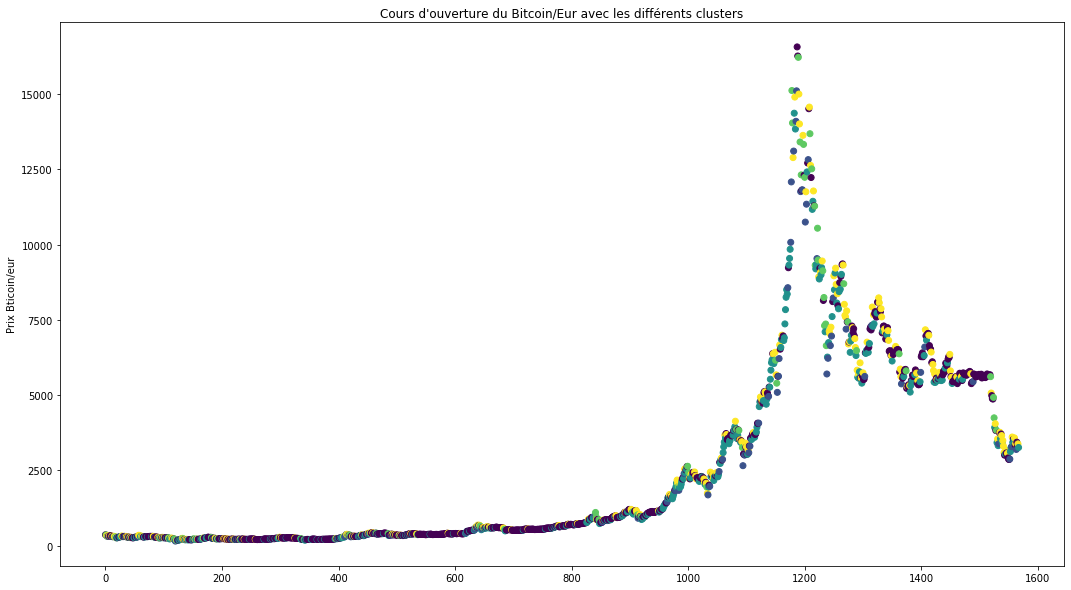

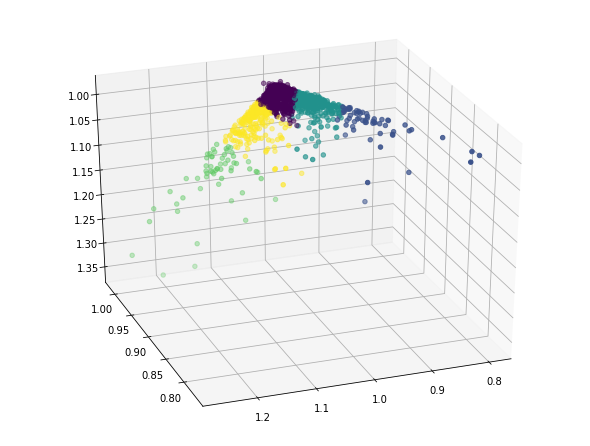

In [36]:
##### Importation de la base de données disponible sur le github
bd_bitcoin = pds.read_csv("btc_eur.csv")

##### Transformation de la base de données
bd_bitcoin["O/C"] = bd_bitcoin["Open"]/bd_bitcoin["Close"]
bd_bitcoin["O/H"] = bd_bitcoin["Open"]/bd_bitcoin["High"]
bd_bitcoin["O/L"] = bd_bitcoin["Open"]/bd_bitcoin["Low"]

##### Algorithme 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
label = km.fit_predict(bd_bitcoin[["O/C", "O/H", "O/L"]].dropna().values)


##### Affichage
x = bd_bitcoin[["Open"]].dropna().values
h_ = [h for h in range(len(x))]
plt.figure(figsize=(18,10))
plt.scatter(h_, x, c=label)
plt.ylabel("Prix Bticoin/eur")
plt.title("Cours d'ouverture du Bitcoin/Eur avec les différents clusters")
plt.show()

##### Affichage
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(bd_bitcoin["O/C"], bd_bitcoin["O/H"], bd_bitcoin["O/L"], c=label)